**</h1><center>COVID-19 INDIA ANALYSIS</center></h1>**


> </h1><center>Mathan Raj O</center></h1>
 </h1><center>09/04/2020</center></h1>







<!-- from IPython.display import Image -->

## Table of Contents

<div  style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Introduction</a>

2. <a href="#item2">Data</a>

3. <a href="#item3">Data Preprocessing</a>

4. <a href="#item4">Exploratory Data Analysis</a>

5. <a href="#item5">Conclusion</a>

</font>
</div>

<a id = 'item1'></a>

## 1.Introduction

<img src = 'Images/PunchCorona.JPG' width= '700'  height= 'auto'/>

### 1.1 Background

>Coronavirus disease (COVID-19) is an infectious disease caused by a new virus.They are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS).
 
### 1.2 Problem Statement

The number of new cases are increasing day by day around the world and it has caused acute shortage of healthcare infrastructure. To address this problem,  we will analyse the  number of beds and hospitals in different states and union territories. Along with this data we collect the patient database in predicting the acute shortages of medical infrastructure and supplement wherever necessary.

In [0]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
from geopy.geocoders import Nominatim
from google.colab import files
import os
import matplotlib.cm as cm
import matplotlib.colors as colors
import plotly.express as px
import plotly.graph_objects as go
import folium
import json
import requests
import datetime as dt
pd.set_option('display.max_rows',None)


Download the dataset from Kaggle

In [0]:
! pip install -q kaggle

from google.colab import files
# Choose the kaggle.json file that you downloaded
files.upload()

# ! mkdir ~/.kaggle
#  Make directory named kaggle and copy kaggle.json file there.
! cp kaggle.json ~/.kaggle/

# Change the permissions of the file.
! chmod 600 ~/.kaggle/kaggle.json


! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-11 13:32:24          48778  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           2765  
fireballbyedimyrnmom/us-counties-covid-19-dataset              US counties COVID 19 dataset                        404KB  2020-04-12 12:09:04           3113  
ryanxjhan/cbc-news-coronavirus-articles-march-26               CBC News Coronavirus/COVID-19 Articles (NLP)          6MB  2020-03-27 23:23:07            652  
bappekim/air

In [0]:
!kaggle datasets download -d sudalairajkumar/covid19-in-india

  0% 0.00/87.1k [00:00<?, ?B/s]
100% 87.1k/87.1k [00:00<00:00, 33.5MB/s]


In [0]:
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset

  0% 0.00/728k [00:00<?, ?B/s]
100% 728k/728k [00:00<00:00, 47.0MB/s]


Extract the zip file

In [0]:
!mkdir covid-19
!mkdir covid-19-world

In [0]:
!unzip covid19-in-india.zip -d covid-19
!unzip novel-corona-virus-2019-dataset.zip -d covid-19-world

Archive:  novel-corona-virus-2019-dataset.zip
  inflating: covid-19-world/COVID19_line_list_data.csv  
  inflating: covid-19-world/COVID19_open_line_list.csv  
  inflating: covid-19-world/covid_19_data.csv  
  inflating: covid-19-world/time_series_covid_19_confirmed.csv  
  inflating: covid-19-world/time_series_covid_19_confirmed_US.csv  
  inflating: covid-19-world/time_series_covid_19_deaths.csv  
  inflating: covid-19-world/time_series_covid_19_deaths_US.csv  
  inflating: covid-19-world/time_series_covid_19_recovered.csv  


In [0]:
files=[]
for dirname, _, filenames in os.walk('covid-19'):
    for filename in filenames:
         files.append(os.path.join(dirname,filename))

In [0]:
# name='covid19-in-india.zip'
# filenames=[]
# with ZipFile(name,'r') as zip:
#               zip.printdir() 
#                 filenames.append(info.filename)
#                 for info in zip.infolist():
#                 zip.extractall()
                

In [0]:
files

['covid-19/ICMRTestingLabs.csv',
 'covid-19/HospitalBedsIndia.csv',
 'covid-19/IndividualDetails.csv',
 'covid-19/AgeGroupDetails.csv',
 'covid-19/ICMRTestingDetails.csv',
 'covid-19/StatewiseTestingDetails.csv',
 'covid-19/population_india_census2011.csv',
 'covid-19/covid_19_india.csv']

<a id='item2'></a>

## 2.Data

## 2.1 DataSource:
The dataset is available as zip file in the Kaggle and it has 7 csv files.
URL - https://www.kaggle.com/sudalairajkumar/covid19-in-india

## 2.2 Files Description:

Following are the file description of the 7 files which will be used in this project.
  1. covid_19_india.csv  - COVID-19 cases at daily level is present in this file
  2. IndividualDetails.csv - Individual level details are present in  file and is obtained from this link(http://portal.covid19india.org/)
  3. population_india_census2011.csv file - This file contains the list of Population at state level.
  4. ICMRTestingDetails.csv - Number of COVID-19 tests at daily level.
  5. HospitalBedsIndia.csv - Number of hospital beds in each state in present in  file and is extracted from this link(https://pib.gov.in/PressReleasePage.aspx?PRID=1539877)
  6. ICMRTestingLabs.csv - This file has the list of testing centres.
  7. AgeGroupDetails.csv - COVID-19 cases age wise.




#### Loading Dataset

In [0]:
df_cov = pd.read_csv('covid-19/covid_19_india.csv', usecols= lambda col: col not in 'Sno')
df_test_dtls = pd.read_csv('covid-19/ICMRTestingDetails.csv', usecols= lambda col: col not in 'Sno')
df_age = pd.read_csv('covid-19/AgeGroupDetails.csv', parse_dates=True, usecols= lambda col: col not in 'Sno')
df_invid_dtls = pd.read_csv('covid-19/IndividualDetails.csv', usecols= lambda col: not str(col).startswith(('Sno','id')))
df_test_labs = pd.read_csv('covid-19/ICMRTestingLabs.csv', usecols= lambda col: col not in 'Sno')
df_hospital = pd.read_csv('covid-19/HospitalBedsIndia.csv', skip_blank_lines=True, usecols= lambda col: not str(col).startswith(('Sno','Unnamed')))
df_pop = pd.read_csv('covid-19/population_india_census2011.csv', usecols= lambda col: col not in 'Sno')

In [0]:
df_world = pd.read_csv('covid-19-world/covid_19_data.csv')

In [0]:

df_world['Date'] = df_world['ObservationDate'].apply(pd.to_datetime)
df_world.drop(['SNo'],axis=1,inplace=True)

df_world.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22


In [0]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_area')

In [0]:
df_stateUT = pd.DataFrame(table[1],columns=['State / Territory','Region'])

In [0]:
df_age.replace('Missing','>=90',inplace=True)

<a id='item3'></a>

## 3.Data Preprocessing

In [0]:
def check_for_duplicates(df,str):
    print('{} Dataframe has {} duplicates'.format(str,df.duplicated().sum()))

In [0]:
check_for_duplicates(df_age,'age')
check_for_duplicates(df_hospital,'hospital')
check_for_duplicates(df_test_dtls,'test')
check_for_duplicates(df_test_labs,'lab')
check_for_duplicates(df_invid_dtls,'invid')
check_for_duplicates(df_cov,'cov')
check_for_duplicates(df_pop,'pop')

age Dataframe has 0 duplicates
hospital Dataframe has 0 duplicates
test Dataframe has 0 duplicates
lab Dataframe has 0 duplicates
invid Dataframe has 5269 duplicates
cov Dataframe has 0 duplicates
pop Dataframe has 0 duplicates


In [0]:
df_hospital.isna().sum()

State/UT                            1
NumPrimaryHealthCenters_HMIS        1
NumCommunityHealthCenters_HMIS      1
NumSubDistrictHospitals_HMIS        8
NumDistrictHospitals_HMIS           1
TotalPublicHealthFacilities_HMIS    1
NumPublicBeds_HMIS                  1
NumRuralHospitals_NHP18             1
NumRuralBeds_NHP18                  1
NumUrbanHospitals_NHP18             1
NumUrbanBeds_NHP18                  1
dtype: int64

Lets replace the NaN values with 0

In [0]:
df_hospital.fillna(0,inplace=True)

In [0]:
df_hospital.isna().sum()

State/UT                            0
NumPrimaryHealthCenters_HMIS        0
NumCommunityHealthCenters_HMIS      0
NumSubDistrictHospitals_HMIS        0
NumDistrictHospitals_HMIS           0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
dtype: int64

###### Dropping rows with index [36,37]  empty row and total counts


In [0]:
df_hospital.drop([36,37],inplace=True)

In [0]:
df_hospital.reset_index(drop=True,inplace=True)

In [0]:
# df_hospital.iloc[:,1:] = df_hospital.iloc[:,1:].applymap(lambda x : int(str(x).replace(',','')))
# df_hospital = df_hospital.applymap(lambda x : str(x).replace(',',''))

In [0]:
df_hospital.dtypes

State/UT                             object
NumPrimaryHealthCenters_HMIS         object
NumCommunityHealthCenters_HMIS       object
NumSubDistrictHospitals_HMIS         object
NumDistrictHospitals_HMIS            object
TotalPublicHealthFacilities_HMIS     object
NumPublicBeds_HMIS                   object
NumRuralHospitals_NHP18             float64
NumRuralBeds_NHP18                  float64
NumUrbanHospitals_NHP18             float64
NumUrbanBeds_NHP18                  float64
dtype: object

In [0]:
for col in df_hospital.columns[1:]:
    print(col)
    df_hospital[col]=df_hospital[col].astype('int64')
  


NumPrimaryHealthCenters_HMIS
NumCommunityHealthCenters_HMIS
NumSubDistrictHospitals_HMIS
NumDistrictHospitals_HMIS
TotalPublicHealthFacilities_HMIS
NumPublicBeds_HMIS
NumRuralHospitals_NHP18
NumRuralBeds_NHP18
NumUrbanHospitals_NHP18
NumUrbanBeds_NHP18


###### Lets add the NumPublicBeds_HMIS, NumRuralBeds_NHP18, and NumRuralBeds_NHP18 numbers to get total beds count

In [0]:
df_hospital['Total_Beds'] = df_hospital['NumPublicBeds_HMIS']+df_hospital['NumRuralBeds_NHP18']+df_hospital['NumRuralBeds_NHP18']

In [0]:
df_hospital.head()

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Total_Beds
0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27,575,3,500,2396
1,Andhra Pradesh,1417,198,31,20,1666,60799,193,6480,65,16658,73759
2,Arunachal Pradesh,122,62,0,15,199,2320,208,2136,10,268,6592
3,Assam,1007,166,14,33,1220,19115,1176,10944,50,6198,41003
4,Bihar,2007,63,33,43,2146,17796,930,6083,103,5936,29962


###### Lets gather the location details for all the states and UT

In [0]:
Longitude=[]
Latitude=[]
for i in range(len(df_hospital)):
    geolocator = Nominatim(user_agent='covid-19',timeout=1000)
    name = df_hospital['State/UT'][i]+', India'
    try:
        locations =  geolocator.geocode(name)
        Latitude.append(locations.latitude)
        Longitude.append(locations.longitude)
    except(AttributeError):
        print("Error",name)

In [0]:
len(Latitude),len(Longitude)

(36, 36)

In [0]:
Latitude[1],Longitude[1]

(15.9240905, 80.1863809)

###### Lets validate the location details. All the latitude and location data of India  should start with (10,35) and (70,97)

In [0]:
# pd.Series(Latitude).between(10,35,inclusive=False)

In [0]:
# pd.Series(Longitude).between(70,97,inclusive=False)

In [0]:
df_hospital['Latitude'] = Latitude
df_hospital['Longitude'] = Longitude

In [0]:
df_cov.isna().sum()

Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [0]:
df_cov.tail()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
889,12/04/20,5:00 PM,Telengana,-,-,43,9,504
890,12/04/20,5:00 PM,Tripura,-,-,0,0,2
891,12/04/20,5:00 PM,Uttarakhand,-,-,5,0,35
892,12/04/20,5:00 PM,Uttar Pradesh,-,-,45,5,452
893,12/04/20,5:00 PM,West Bengal,-,-,19,5,134


In [0]:
df_cov.isna().sum()

Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [0]:
df_cov.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [0]:
# def add_daily_measures(df):
#     df.loc[0,'Daily Cases'] = df.loc[0,'Confirmed']
#     df.loc[0,'Daily Deaths'] = df.loc[0,'Deaths']
#     for i in range(1,len(df)):
#         df.loc[i,'Daily Cases'] = df.loc[i,'Confirmed'] - df.loc[i-1,'Confirmed']
#         df.loc[i,'Daily Deaths'] = df.loc[i,'Deaths'] - df.loc[i-1,'Deaths']
#     #Make the first row as 0 because we don't know the previous value
#     df.loc[0,'Daily Cases'] = 0
#     df.loc[0,'Daily Deaths'] = 0
#     return df

In [0]:
df_cov['Date'] = pd.to_datetime(df_cov['Date'],format='%d/%m/%y')

<a id='item4'><a/>

## 4.Exploratory Data Analysis

### 4.1 Number of Beds per State and UT

In [0]:
df_hosp = df_hospital.copy()
df_hosp.sort_values('Total_Beds',ascending=False,inplace=True)

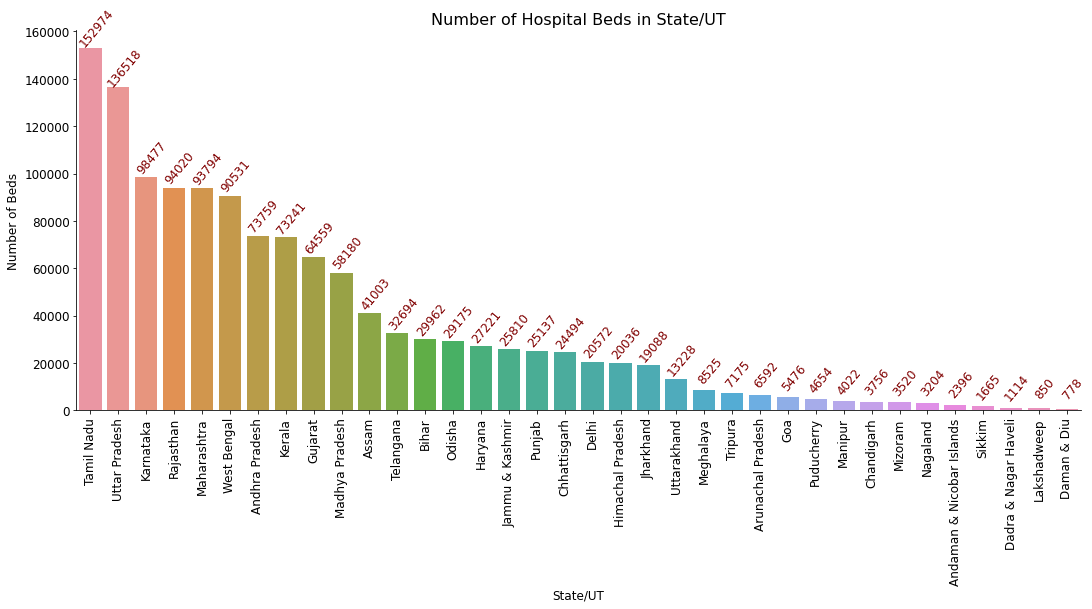

In [0]:
fig = plt.figure(figsize=(18,7))
ax = sns.barplot(df_hosp['State/UT'],df_hosp['Total_Beds'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 1.3, 
          p.get_height()), ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points',rotation=50,fontsize=12,color='maroon')
# ax.spines['left'].set_visible(False)
for label in ax.xaxis.get_ticklabels():
  label.set_fontsize(12)
for label in ax.yaxis.get_ticklabels():
  label.set_fontsize(12)
plt.title('Number of Hospital Beds in State/UT',fontsize=16)
plt.xticks(rotation='vertical')
plt.xlabel('State/UT',fontsize=12)
# plt.legend(df_hospital['Total_Beds'],loc='upper right',bbox_to_anchor=(1.1, 1.1),fontsize=11,edgecolor='inherit')
plt.ylabel('Number of Beds',fontsize=12)
plt.show()

In [0]:
df_hospital['Total_Beds'].sum()

1298200

There are totally **Twelve Lakh Ninety Thosand and Two Hundred beds(1298200)** available in India.<br>


**Top Five States/UT with highest number of beds**:<br>
Tamilnadu has more number of beds in India - **152974**<br>
Uttar Prades - **136518**<br>
Karnataka - **98477**<br>
Rajasthn - **94020**<br>
Maharashtra - **93794**<br>

COVID-19 India Daily, Deaths and Cured Cases

In [0]:
# fig = go.Figure(data=[
#     go.Bar(name='Cases', x=df_covid['Date'], y=df_covid['Confirmed'],text=df_covid['Confirmed'],textposition='auto' ),
#     go.Bar(name='Cured', x=df_covid['Date'], y=df_covid['Cured']),
#     go.Bar(name='Deaths', x=df_covid['Date'], y=df_covid['Deaths'])
# ])
# fig.update_layout(barmode='overlay', title='COVID-19 India Daily, Deaths and Cured Cases')
# # fig.update_xaxes(rangeslider_visible=True)
# fig.show()

In [0]:
df_covid = df_cov.copy()
df_covid = df_cov.groupby('Date',as_index=False)['Confirmed','Deaths','Cured'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [0]:
def calGrowthRate(df,str):
    growth_diff=[]
    for i in range(1,len(df)):
        growth_diff.append(df[str].iloc[i] / df[str].iloc[i-1])
#  return (sum(growth_diff)/len(growth_diff))
    return (growth_diff)


In [0]:
fig = go.Figure(data=[
    go.Scatter(name='Cases', x=df_covid['Date'], y=df_covid['Confirmed'],mode='lines+markers'),
    go.Scatter(name='Cured', x=df_covid['Date'], y=df_covid['Cured'],mode='lines+markers'),
    go.Scatter(name='Deaths', x=df_covid['Date'], y=df_covid['Deaths'],mode='lines+markers')
])
fig.update_layout(barmode='stack', title='COVID-19  Confirmed, Deaths and Cured Cases - India',
                  annotations=[dict(x='2020-03-23', y=433, xref="x", yref="y",
                                    text="Lockdown Imposed(23rd March)", showarrow=True, arrowhead=1, ax=-50, ay=-100),
                               dict(x='2020-01-30', y=0, xref="x", yref="y",
                                    text="First Case Detected(30th Jan)", showarrow=True, arrowhead=1, ax=-50, ay=-100),
                               ])
# fig.update_xaxes(rangeslider_visible=True)

fig.show()


###### The first case was diagonsed on Jan 30th and after 52 days lockdown was imposed  with confirmed Cases, Deaths standing on 433 and 24 respectively.After 22 days of lockdown, there are 8447 confirmed cases, 273 deaths and 765 recovered cases.

In [0]:

fig = go.Figure(data=[
     go.Scatter(name='Logarithmic Scale India', x=df_covid['Date'], y=df_covid['Confirmed']),
     go.Scatter(name='Logarithmic Scale USA', x=df_US_group['Date'], y=df_US_group['Confirmed'],mode='lines+markers')
])
fig.update_layout( title='Log Scale of India and USA Confirmed Cases', yaxis_type="log")
# fig.update_xaxes(rangeslider_visible=True)

fig.show()


###### Lets Compare USA and India Confirmed Cases

In [0]:
df_USA = df_world[df_world['Country/Region']=='US'].copy()


In [0]:
df_USA.reset_index(drop=True,inplace=True)
df_USA = df_USA[['Date','Confirmed','Deaths','Recovered']]
df_US_group = df_USA.groupby('Date',as_index=False)['Confirmed','Deaths','Recovered'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [0]:
fig = go.Figure(data=[
    go.Scatter(name='India Cases', x=df_covid['Date'], y=df_covid['Confirmed'],mode='lines+markers'),
     go.Scatter(name='USA Cases', x=df_US_group['Date'], y=df_US_group['Confirmed'],mode='lines+markers')
])
fig.update_layout(barmode='stack', title='India VS USA Confirmed Cases',
                  annotations=[dict(x='2020-03-23', y=433, xref="x", yref="y",
                                    text="Lockdown Imposed(23rd March)", showarrow=True, arrowhead=1, ax=-50, ay=-100),
                               dict(x='2020-01-30', y=0, xref="x", yref="y",
                                    text="1st Case Ind", showarrow=True, arrowhead=1, ax=-50, ay=-100),
                               dict(x='2020-01-22', y=0, xref="x", yref="y",
                                    text="1st Case  USA", showarrow=True, arrowhead=1, ax=-50, ay=-100),
                               ])
# fig.update_xaxes(rangeslider_visible=True)

fig.show()


###### The first case for USA and India was diagonsed on Jan 22nd and Jan30th respectively. So, India were 8 days behind USA which is a notable difference given the nature of the virus. When India imposed lockdwon(March 23rd), USA had almost 43K cases veruse 433 in India.This huge difference is because of lockdown and lack of testing in India.


###### Lets Calculate the growth rate after lockdown for India and USA


In [0]:
df_covid_slct_data = df_covid[(df_covid['Date']>='2020-01-23')& (df_covid['Date']<='2020-03-23')]
calGrowthRate(df_covid)

1.168286310920373

In [0]:
df_US_group_data = df_US_group[(df_US_group['Date']>='2020-01-30')& (df_US_group['Date']<='2020-03-23')]
calGrowthRate(df_US_group_data)

[1.2,
 1.3333333333333333,
 1.0,
 1.375,
 1.0,
 1.0909090909090908,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0833333333333333,
 1.0,
 1.1538461538461537,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.3333333333333335,
 1.0,
 1.0,
 1.5142857142857142,
 1.0,
 1.1132075471698113,
 1.0169491525423728,
 1.0333333333333334,
 1.1290322580645162,
 1.0857142857142856,
 1.3289473684210527,
 1.2079207920792079,
 1.2540983606557377,
 1.4444444444444444,
 1.257918552036199,
 1.5,
 1.2877697841726619,
 1.1266294227188083,
 1.5851239669421489,
 1.3357664233576643,
 1.2982045277127245,
 1.3102826217678893,
 1.2510325837540155,
 1.2835656639765223,
 1.3238068019434124,
 1.3862262521588946,
 1.2125837097025385,
 1.7569997431286926,
 1.3962719298245614,
 1.3357415842102507,
 1.326644195343733,
 1.2900909950366344]

In [0]:
df_US_group_data.tail()S

,Date,Confirmed,Deaths,Cured
57,2020-03-19,13680.0,200.0,108.0
58,2020-03-20,19101.0,244.0,147.0
59,2020-03-21,25514.0,307.0,171.0
60,2020-03-22,33848.0,427.0,0.0
61,2020-03-23,43667.0,552.0,0.0


In [0]:
df_covid_growth = df_covid.copy()
df_cov_gr_date = df_covid_growth[df_covid_growth['Date'].between('2020-03-24','2020-04-12')]
df_cov_gr_date['Confirmed'] = 20*df_cov_gr_date['Confirmed']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
df_covid_growth = df_covid_growth[df_covid_growth['Date'].between('2020-01-30','2020-03-23')]

In [0]:
df_covid_us = pd.concat([df_covid_growth,df_cov_gr_date])

In [0]:
df_covid_us.tail()

,Date,Confirmed,Deaths,Cured
69,2020-04-08,105480,149,411
70,2020-04-09,117300,169,478
71,2020-04-10,135220,206,516
72,2020-04-11,150580,242,653
73,2020-04-12,168940,273,765


In [0]:
fig = go.Figure(data=[
    go.Scatter(name='India Cases', x=df_covid['Date'], y=df_covid['Confirmed'],mode='lines+markers'),
     go.Scatter(name='India Cases Without Lockdown', x=df_covid_us['Date'], y=df_covid_us['Confirmed'],mode='lines+markers')
    #  go.Scatter(name='USA Cases', x=df_US_group['Date'], y=df_US_group['Confirmed'],mode='lines+markers')
])
fig.update_layout(barmode='stack', title='India Without Lockdown',
                  annotations=[dict(x='2020-03-23', y=433, xref="x", yref="y",
                                    text="Lockdown Imposed(23rd March)", showarrow=True, arrowhead=1, ax=-50, ay=-100),
                               dict(x='2020-01-30', y=0, xref="x", yref="y",
                                    text="1st Case Ind", showarrow=True, arrowhead=1, ax=-50, ay=-100),
                                dict(text='Without Lockdown',x='2020-04-01', y=36680, xref="x", yref="y",
                                      showarrow=True, arrowhead=1, ax=-50, ay=-100),
                               ])
# fig.update_xaxes(rangeslider_visible=True)

fig.show()


###### Number of Cases and Beds available - State/UT

###### Grouping by 'State/UnionTerritory' and taking the max value to get the total no of cases up to date for each State/UT,

In [0]:
df_stateUT.rename(columns={'State / Territory':'State/UT'},inplace=True)

In [0]:
df_stateUT.drop([36,37],axis=0,inplace=True)

In [0]:
def changeStateName(df):
  if 'Telengana' in df['State/UT'].values:
    print('True')
    return df.replace('Telengana','Telangana')
  else:
    return df

In [0]:
df_state_wise = df_cov[['State/UnionTerritory','Confirmed','Deaths','Cured']].copy()
df_state_wise = df_state_wise.groupby(['State/UnionTerritory'],as_index=False)['Confirmed','Deaths','Cured'].max()
df_state_wise.rename(columns={'State/UnionTerritory':'State/UT'},inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [0]:
df_state_wise = changeStateName(df_state_wise)

True


In [0]:
df_state_wise[df_state_wise['State/UT'] =='Unassigned']

,State/UT,Confirmed,Deaths,Cured
28,Unassigned,77,0,0


Lets remove the Unassigned Observations

In [0]:
df_state_wise.drop(df_state_wise[df_state_wise['State/UT'] =='Unassigned'].index,axis=0,inplace=True)

In [0]:
df_state_wise.reset_index(drop=True,inplace=True)

In [0]:
df_hosp_beds = df_hospital[['State/UT','Total_Beds']].copy()
# df_hosp_beds

###### Dropping 'Dadra & Nagar Haveli','Daman & Diu' as we dont have values in Covid-19 dataframe for these

In [0]:

indexNames = df_hosp_beds[(df_hosp_beds['State/UT']=='Dadra & Nagar Haveli') | ( df_hosp_beds['State/UT']=='Daman & Diu')].index

In [0]:
df_hosp_beds.drop(indexNames,axis=0,inplace=True)

In [0]:
states_dict = dict(zip(list(df_stateUT['State/UT'].str[:6]),list(df_stateUT['State/UT'])))
df_state_wise['State/UT'] = df_state_wise['State/UT'].str[:6].map(states_dict)
df_hosp_beds['State/UT'] =df_hosp_beds['State/UT'].str[:6].map(states_dict)
df_state_wise.sort_values('State/UT',inplace=True)
df_hosp_beds.sort_values('State/UT',inplace=True)

In [0]:
df_state_beds = df_state_wise.merge(df_hosp_beds, on=['State/UT'],how='inner')

In [0]:
df_state_beds.sort_values('Confirmed',ascending=False,inplace=True)
df_state_beds.reset_index(drop=True,inplace=True)
df_state_beds['Mortality_Rate'] =np.round((df_state_beds['Deaths']/df_state_beds['Confirmed'])*100,2)
df_state_beds =df_state_beds[['State/UT','Confirmed','Deaths','Cured','Mortality_Rate','Total_Beds']] 
# df_state_beds = df_state_beds.append({'State/UT':'Total','Confirmed':df_state_beds.Confirmed.sum(),'Deaths':df_state_beds.Deaths.sum(),
#                       'Cured':df_state_beds.Cured.sum(),'Total_Beds':df_state_beds.Total_Beds.sum()}, ignore_index=True)
# df_state_beds.style.background_gradient(cmap='RdYlGn_r')
df_state_beds.style.background_gradient(cmap='magma_r',subset=["Confirmed"])\
                        .background_gradient(cmap='RdGy',subset=["Deaths"])\
                        .background_gradient(cmap='YlGn',subset=["Cured"])\
                        .background_gradient(cmap='BuGn_r',subset=["Mortality_Rate"])\
                        .background_gradient(cmap='PuBuGn_r',subset=["Total_Beds"])

,State/UT,Confirmed,Deaths,Cured,Mortality_Rate,Total_Beds
0,Maharashtra,1761,127,208,7.210000,93794
1,Delhi,1069,19,25,1.780000,20572
2,Tamil Nadu,969,10,44,1.030000,152974
3,Rajasthan,700,3,21,0.430000,94020
4,Madhya Pradesh,564,36,0,6.380000,58180
5,Telangana,504,9,43,1.790000,32694
6,Uttar Pradesh,452,5,45,1.110000,136518
7,Gujarat,432,22,44,5.090000,64559
8,Andhra Pradesh,381,6,11,1.570000,73759
9,Kerala,374,2,142,0.530000,73241


In [0]:
fig = go.Figure(data=[
    go.Bar(name='Confirmed Cases', x=df_state_beds['State/UT'], y=df_state_beds['Confirmed'],text=df_state_beds['Confirmed'],textposition='auto',orientation='v'),
    go.Bar(name='Beds Available', x=df_state_beds['State/UT'], y=df_state_beds['Total_Beds'],text=df_state_beds['Total_Beds'],textposition='auto',orientation='v')
    # go.Bar(name='Deaths', x=df_covid['Date'], y=df_covid['Deaths'])
])
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.update_layout(barmode='group', title='State/UT breakdown of Confirmed Cases and Number of Beds available')
# fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [0]:
df_total_cases_beds = pd.DataFrame({'Total':['Total'],'Total Confirmed':[df_state_beds.Confirmed.sum()],'Total Deaths':[df_state_beds.Deaths.sum()],
                       'Total Cured':[df_state_beds.Cured.sum()],'Total_Beds':[df_state_beds.Total_Beds.sum()]})

In [0]:
fig = go.Figure(data=[
          go.Bar(name='Total Confirmed',x=df_total_cases_beds['Total'],y=df_total_cases_beds['Total Confirmed'],text=df_total_cases_beds['Total Confirmed']),
          go.Bar(name='Total Deaths',x=df_total_cases_beds['Total'],y=df_total_cases_beds['Total Deaths'],text=df_total_cases_beds['Total Deaths']),
          go.Bar(name='Total Beds Available',x=df_total_cases_beds['Total'],y=df_total_cases_beds['Total_Beds'],text=df_total_cases_beds['Total_Beds'],marker_color='crimson')
          
    ])
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.update_layout(title='Total number cases versus number of beds available in India')
fig.show()


In [0]:
fig = go.Figure(data=[
                      go.Pie(labels=df_age['AgeGroup'],values=df_age['TotalCases'],pull=[0,0,0.2,0,0,0,0,0,0,0,0])
])
fig.update_layout(title='Age Wise Spread of COVID-19 Cases in India')
fig.show()

###### As per the above pie chart, the most affected age group is 20-29 and it is followed by 30-39. Altogether, 40% of the cases fall under age less than 40 which is expected since there would be more working people here. And this is also says elderly people have more chance of getting affected.

In [0]:
df_indi =df_invid_dtls .copy()
df_indi.dropna(subset=['current_status', 'age'], inplace=True)
df_indi.reset_index(drop=True, inplace=True)
# df_US_group = df_USA.groupby('Date',as_index=False)['Confirmed','Deaths','Recovered'].sum()

In [0]:
df1_indians = df_indi[df_indi['current_status'] == 'Deceased']
df2_indians = df_indi[df_indi['current_status'] == 'Hospitalized']
df3_indians = df_indi[df_indi['current_status'] == 'Recovered']

fig = go.Figure()
fig.add_trace(go.Box(y=df1_indians['age'], name="Deceased Patients"))
fig.add_trace(go.Box(y=df2_indians['age'], name="Hospitalized Patients"))
fig.add_trace(go.Box(y=df3_indians['age'], name="Recovered Patients"))
fig.update_layout(title_text='Indian COVID-19 Patients Outcome Age-Wise')
fig.show()

In [0]:
pep_no_trav_his = df_indi[df_indi['notes'].str.contains('Travel') == False]
pep_with_trav_his = df_indi[df_indi['notes'].str.contains('Travel') == True]

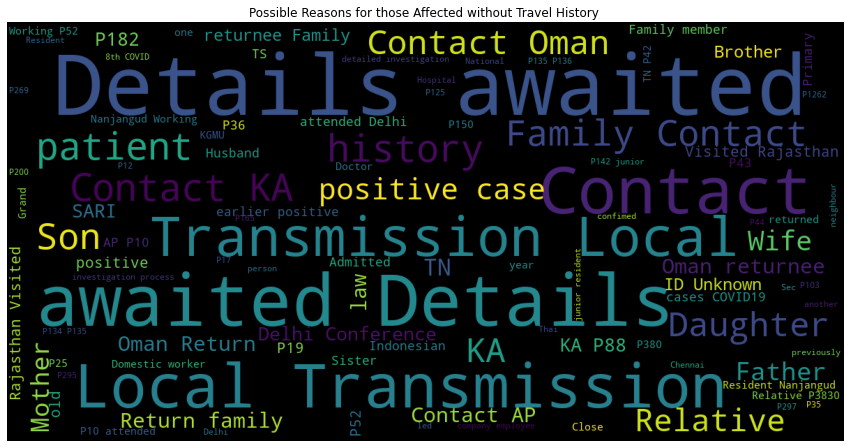

In [0]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.title('Possible Reasons for those Affected without Travel History ')
    plt.show()
    

show_wordcloud(pep_no_trav_his['notes'].apply(lambda x: x.replace('travel', '')))

###### The main reasons for those affetced without travel history are Conatct with the infected ones and local transmission

In [0]:
df_testing_dtls = df_test_dtls.copy()

In [0]:
df_testing_dtls.drop(['TotalIndividualsTested','Source'],axis=1,inplace=True)
df_testing_dtls.fillna(df_testing_dtls.median(),inplace=True)
df_testing_dtls['DateTime'] = pd.to_datetime(df_testing_dtls['DateTime'],format='%d/%m/%y %H:%M')


In [0]:
df_testing_dtls['Date']=[dt.datetime.date(d) for d in df_testing_dtls['DateTime']]
df_testing_dtls.drop(['SNo','DateTime'],axis=1,inplace=True)
df_testing_dtls['Diagnosed_Rate'] = (( df_testing_dtls['TotalPositiveCases']/df_testing_dtls['TotalSamplesTested'])*100).map('{:,.2f}%'.format)

In [0]:
# df_testing_dtls.set_index('Date',drop=True,inplace=True)

In [0]:
df_testing_dtls.columns

Index(['TotalSamplesTested', 'TotalPositiveCases', 'Date', 'Diagnosed_Rate'], dtype='object')

In [0]:
fig=go.Figure(data=[
                    go.Bar(name='TotalSamplesTested',x=df_testing_dtls['Date'],y=df_testing_dtls['TotalSamplesTested'],text=df_testing_dtls['TotalSamplesTested']),
                     go.Bar(name='TotalPositiveCases',x=df_testing_dtls['Date'],y=df_testing_dtls['TotalPositiveCases'],text=df_testing_dtls['TotalPositiveCases'])
])
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.update_layout(title='Day Wise Testing and Diagnosed Status')

In [0]:
np.array(df_testing_dtls['TotalPositiveCases'].max()),int(df_testing_dtls['TotalSamplesTested'].max())

(array(7703.), 179374)

In [0]:
fig = go.Figure(data=[
          # go.Bar(name='Total Confirmed',x=df_total_cases_beds['Total'],y=df_total_cases_beds['Total Confirmed'],text=df_total_cases_beds['Total Confirmed']),
          # go.Bar(name='Total Deaths',x=df_total_cases_beds['Total'],y=df_total_cases_beds['Total Deaths'],text=df_total_cases_beds['Total Deaths']),
          # go.Bar(name='Total Samples Tested',x=df_total_cases_beds['Total'],y=[df_testing_dtls['TotalSamplesTested'].sum()],text=[df_testing_dtls['TotalSamplesTested'].sum()]),
          #  go.Bar(name='Total Deaths',x=df_total_cases_beds['Total'],y=['1387297452'],text=['1387297452'])
           go.Pie(labels=['TotalSamplesTested','Total Confirmed Cases','India Population'],values=[179374,7703,1387297452])
          
    ])
# fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
# fig.update_layout(title='Total number cases versus number of beds available in India')
fig.show()


Lets get the geoJSON data for India

In [0]:
!wget 'https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson' -o india.json

In [0]:

req = requests.get('https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson')
# decoded_data = req.text.encode().decode('utf-8-sig')
# india_geo = json.loads(decoded_data)
india_geo = req.json()

In [0]:
# india_geo = r'india.json'
# india_map = folium.Map(location=(20.5937, 78.9629))

In [0]:
# fig = px.choropleth(df_state_beds, geojson=india_geo, locations='State/UT', color='Deaths',
#                            color_continuous_scale=px.colors.sequential.Plasma,hover_data=['Cured','Deaths','Confirmed','Total_Beds'],
#                            featureidkey="properties.NAME_1",
#                            title='State/UT Wise Breakdown of Cases and Beds available'
#                           )
# fig.update_geos(fitbounds="locations", visible=True)
# fig.update_geos(projection_type="orthographic")
# fig.update_layout(height=600,margin={"r":0,"t":30,"l":0,"b":30}
                  
#                                )
# fig.show()

Prediction

In [0]:

growth_rate_ind = calGrowthRate(df_covid,'Confirmed')
avg_growth_rate = np.mean(growth_rate_ind)

In [0]:
avg_growth_rate

1.168286310920373

In [0]:
fig = go.Figure(data=[
go.Scatter(x=df_covid['Date'], y=growth_rate_ind)])


fig.update_layout(title_text='COVID-19 Growth Rate',xaxis_showgrid=False, yaxis_showgrid=False, width=800, yaxis_title='Growth Rate',
        height=500,font=dict(
        size=12,
        color="white"
    ))
fig.layout.plot_bgcolor = 'Maroon'
fig.layout.paper_bgcolor = 'Maroon'
fig.show()

In [0]:
import requests
indiatest = pd.io.json.json_normalize(requests.get('https://api.rootnet.in/covid19-in/stats/testing/history').json()['data'])
indiatest.drop(['totalIndividualsTested','source'], axis=1, inplace=True)
indiatest['day'] = indiatest['day'].apply(pd.to_datetime)

indiatest["totalSamplesTested_diff"] = indiatest["totalSamplesTested"].diff()
indiatest["totalPositiveCases_diff"] = indiatest["totalPositiveCases"].diff()
indiatest["p2t_ratio"]= np.round(100*indiatest["totalPositiveCases_diff"]/indiatest["totalSamplesTested_diff"],2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



In [0]:
("** Present Sample Tested for COVID-19 in India**")
print('Total Sample Tested: ',indiatest['totalSamplesTested'].max())
print('Total Positive to Test Ratio:',np.round(100*indiatest["totalPositiveCases"].max()/indiatest["totalSamplesTested"].max(),2))
print('Tests Per Million Peoples:', np.round(100000*indiatest["totalSamplesTested"].max()/df_pop["Population"].sum(),2))pd

Total Sample Tested:  195748.0
Total Positive to Test Ratio: 4.25
Tests Per Million Peoples: 16.17


In [0]:
pd.DataFrame({'Total Sample Tested': [ '195748.0'],'Total Positive to Test Ratio': ['4.25'],'Tests Per Million Peoples': ['16.17']})

,Total Sample Tested,Total Positive to Test Ratio,Tests Per Million Peoples
0,195748.0,4.25,16.17


Lets Predict for the next 30 days using the average growth rate

In [0]:
df_covid.iloc[2]

Date         2020-02-01 00:00:00
Confirmed                      2
Deaths                         0
Cured                          0
Name: 2, dtype: object

In [0]:
prediction_dates = []
current_date = df_covid['Date'].iloc[len(df_covid)-1]
for i in range(1,15):
  date = current_date+dt.timedelta(days=i)
  prediction_dates.append(date)
  


In [0]:
starting_value = df_covid['Confirmed'].iloc[len(df_covid)-1]
predictions =[]
for i in range(1,15):
  if not predictions:
      predictions.append(starting_value * avg_growth_rate)
  else:
     predictions.append((predictions[i-2]) * avg_growth_rate)



In [0]:
fig = go.Figure(data=[
    go.Bar(name='Cases', x=df_covid['Date'], y=df_covid['Confirmed'], text= df_covid['Confirmed'],textfont=dict(family="sans serif", size=18),textposition='outside'
     ),
    go.Bar(name='Predicted Cases', x=prediction_dates, y=predictions,text=predictions,textfont=dict(family="sans serif", size=18),textposition='outside')
])
# fig.update_traces(textposition='outside',texttemplate='%{text:.2s}')

fig.update_layout(barmode='stack', title='COVID-19  Current and Predicted Confirmed Cases',
                  annotations=[dict(x='2020-03-23', y=433, xref="x", yref="y",
                                    text="Lockdown Imposed(23rd March)", showarrow=True, arrowhead=1, ax=-50, ay=-100),
                               dict(x='2020-01-30', y=0, xref="x", yref="y",
                                    text="First Case Detected(30th Jan)", showarrow=True, arrowhead=1, ax=-50, ay=-100),
                               dict(x='2020-04-13', y=0, xref="x", yref="y",
                                    text="Prediction", showarrow=True, arrowhead=1, ax=-50, ay=-100),
                               ])

# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig.update_xaxes(rangeslider_visible=True)

fig.show()

By using the average growth rate, I have predicted approximately the cases could reach 74K by April 26th.

<a id='item5'></a>

## 5.Conclusion

We are in Stage2 at the moment, not very far behind the next stage if we don't act right. Reaching the inflection point will be the end game to this pandemic but not without the support of every one of you. So what we do????

It's so simple. Stay Home! Stay Healthy! We can together defeat it.

<img src='Images/AvengersAssemble.jpg'>